In [ ]:
pip install mlinsights

In [ ]:
#open pkl
with open('/content/drive/MyDrive/sensor_data.pkl', 'rb') as f:
    data = pickle.load(f)
df = pd.DataFrame(data)
df.dropna(inplace = True) 

In [ ]:
## Fill NAN DATA and Describe
df=df.fillna(0)     ##  0 means delete for nan data


for this data we dont have nan. 

In [ ]:
df

,Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,Col14,Col15,Col16,Col17,Col18,Col19,Col20,Col21,Output
date,,,,,,,,,,,,,,,,,,,,,,,
2019-12-01 20:15:00,0.0,46.999207,54.409090,727.719907,15.693373,59.600000,59.5800,1.422936,90.509259,83.839699,4.199942,3.548900,3.732175,188.086971,35.860340,161.349826,73.914931,143.292721,87.434896,69.377790,0.458104,0.515832,0.000000
2019-12-01 20:30:00,0.0,46.999207,54.545455,727.719907,14.633970,84.344325,81.9275,1.429543,88.006366,94.138214,4.207176,3.572049,3.787616,188.078704,35.841049,163.320312,78.456597,140.979456,84.863715,62.522859,0.480385,0.556511,0.000000
2019-12-01 20:45:00,0.0,46.999673,54.454546,727.777778,16.210609,89.286667,89.3750,1.433111,81.481481,76.654731,4.168113,3.530937,3.746263,188.155864,35.734954,156.406250,78.057292,146.038773,78.348958,67.981481,0.499068,0.534497,0.000000
2019-12-01 21:00:00,0.0,47.288057,54.363635,729.728350,16.355613,84.443333,84.4100,1.440972,75.053048,55.931713,4.131944,3.573495,4.429832,188.634259,34.191744,161.179832,75.338542,143.236400,85.841291,67.897859,0.467419,0.525973,5.043403
2019-12-01 21:15:00,0.0,47.146217,54.272724,728.877315,24.717882,88.221667,88.3800,1.441683,68.610147,59.892940,4.108796,3.547936,4.440208,188.148148,34.012277,158.629919,74.448661,144.024884,84.181258,69.576224,0.469323,0.516915,7.104311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-29 17:45:00,1.0,63.475134,55.409090,766.586968,76.934762,4.432500,64.5450,1.405266,85.073061,60.177951,5.594618,3.707988,3.795401,186.091821,36.700424,190.957755,66.307292,150.434028,124.650463,84.126736,0.347235,0.440773,0.015191
2020-08-29 18:00:00,0.0,64.870318,55.409089,769.149552,85.245949,69.504000,69.5150,1.418475,72.207755,73.148148,5.590278,3.729745,3.554205,185.860340,36.736111,199.903067,92.778646,145.699508,107.124421,52.920862,0.464118,0.636781,0.000000
2020-08-29 18:15:00,0.0,62.174968,55.393939,764.198909,96.657986,79.432500,76.9625,1.409746,62.914738,50.694444,5.588349,3.684689,3.967593,185.671296,36.523954,189.236111,75.434028,152.575231,113.802083,77.141204,0.398624,0.494405,0.000000


In [ ]:
train_size = int(len(df) * 0.85)
train = df[:train_size]
test = df[train_size:]
train_size

13575

In [ ]:
#plotly vissualization

df_to_plot=train[0:1000]

fig = go.Figure()
fig.add_trace(go.Scatter(x = df_to_plot.index, y = df_to_plot['Col1'],mode='lines',name = 'Col1'))
fig.add_trace(go.Scatter(x = df_to_plot.index, y = df_to_plot['Col6'],mode='lines',name = 'Col6'))



In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = df_to_plot.index, y = df_to_plot['Output'],mode='lines',name = 'Output'))


In [ ]:
N=df.Output.values
N=np.array([N])
N=pd.DataFrame(N)
N.corr()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,15931,15932,15933,15934,15935,15936,15937,15938,15939,15940,15941,15942,15943,15944,15945,15946,15947,15948,15949,15950,15951,15952,15953,15954,15955,15956,15957,15958,15959,15960,15961,15962,15963,15964,15965,15966,15967,15968,15969,15970
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfNumpytrain=df_to_plot.to_numpy();
dfPandastrain=pd.DataFrame(dfNumpytrain);
dfNumpytrainAll=train.to_numpy();
dfPandastrainAll=pd.DataFrame(dfNumpytrainAll);
dfNumpytest=test.to_numpy();
dfPandastest=pd.DataFrame(dfNumpytest);

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = dfPandastrain.index, y =dfPandastrain[22],mode='lines',name = 'Output'))

In [ ]:
## Calculate error_0
X_train=dfNumpytrainAll[:,0:22];
Y_train=dfNumpytrainAll[:,22]
X_test=dfNumpytest[:,0:22];
Y_test=dfNumpytest[:,22];
ErrorTrain_0 = mean_squared_error(np.zeros((len(dfNumpytrainAll),1)),Y_train)
ErrorTest_0 =mean_squared_error(np.zeros((len(dfNumpytest),1)),Y_test)

In [ ]:
## Define function alpha
def alpha1(a,b):
  return abs(1-b/a)

In [ ]:
## Linear fit
reg = LinearRegression().fit(X_train,Y_train)
Y_trainpredict=reg.predict(X_train);
Y_testpredict=reg.predict(X_test);
ErrorTrain_1=mean_squared_error(Y_train,Y_trainpredict);
ErrorTest_1=mean_squared_error(Y_test,Y_testpredict);
alpha_train_1=alpha1(ErrorTrain_0,ErrorTrain_1);
alpha_test_1=alpha1(ErrorTest_0,ErrorTest_1);
print('alpha_train_1 = ',alpha_train_1,'\n','alpha_test_1 = ',alpha_test_1)

alpha_train_1 =  0.021702105023615248 
 alpha_test_1 =  0.018629794209108708


In [ ]:
## Linear fit ridge
ErrorTrain_2=np.zeros((1,101))
alpha_train_2=np.zeros((1,101))
alpha_test_2=np.zeros((1,101))
ErrorTest_2=np.zeros((1,101))
for landa in range(101):
  clf = Ridge(alpha=landa)
  clf.fit(X_train,Y_train)
  Y_trainpredict=clf.predict(X_train)
  Y_testpredict=clf.predict(X_test)
  ErrorTrain_2[0,landa]=mean_squared_error(Y_train,Y_trainpredict);
  ErrorTest_2[0,landa]=mean_squared_error(Y_test,Y_testpredict);
  alpha_train_2[0,landa]=alpha1(ErrorTrain_0,ErrorTrain_2[0,landa])
  alpha_test_2[0,landa]=alpha1(ErrorTrain_0,ErrorTest_2[0,landa])

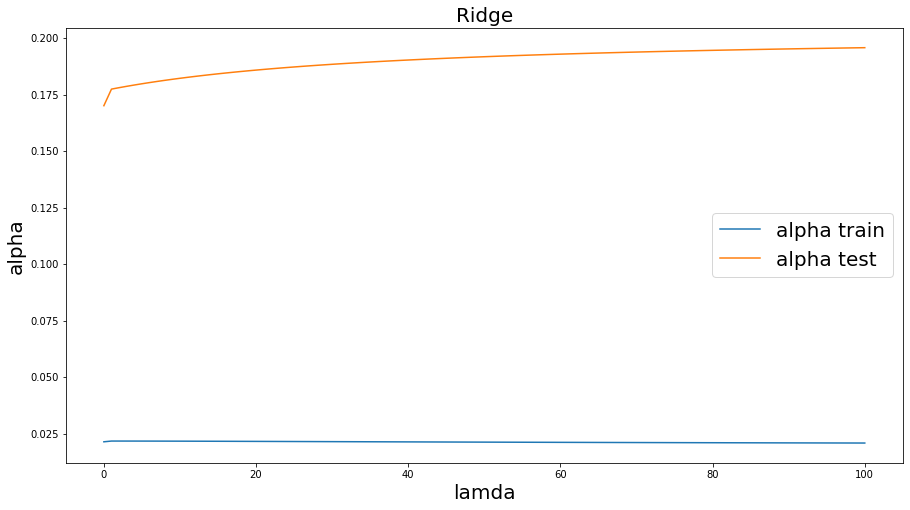

In [ ]:
f=plt.figure(figsize=(15,8))
plt.plot(alpha_train_2[0,:],label='alpha train')
plt.plot(alpha_test_2[0,:],label='alpha test')
plt.legend(fontsize=20)
plt.xlabel('lamda',fontsize=20);
plt.ylabel('alpha',fontsize=20);
plt.title('Ridge',fontsize=20);

In [ ]:
## lasso 
from sklearn import linear_model
ErrorTrain_3=np.zeros((1,101))
alpha_train_3=np.zeros((1,101))
alpha_test_3=np.zeros((1,101))
ErrorTest_3=np.zeros((1,101))
for landa in range(101):
  clf = linear_model.Lasso(alpha=landa)
  clf.fit(X_train,Y_train)
  Y_trainpredict=clf.predict(X_train)
  Y_testpredict=clf.predict(X_test)
  ErrorTrain_3[0,landa]=mean_squared_error(Y_train,Y_trainpredict);
  ErrorTest_3[0,landa]=mean_squared_error(Y_test,Y_testpredict);
  alpha_train_3[0,landa]=alpha1(ErrorTrain_0,ErrorTrain_3[0,landa])
  alpha_test_3[0,landa]=alpha1(ErrorTrain_0,ErrorTest_3[0,landa])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning:

Coordinate descent with no regularization may lead to unexpected results and is discouraged.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 41974.21153308573, tolerance: 8.581069400298873



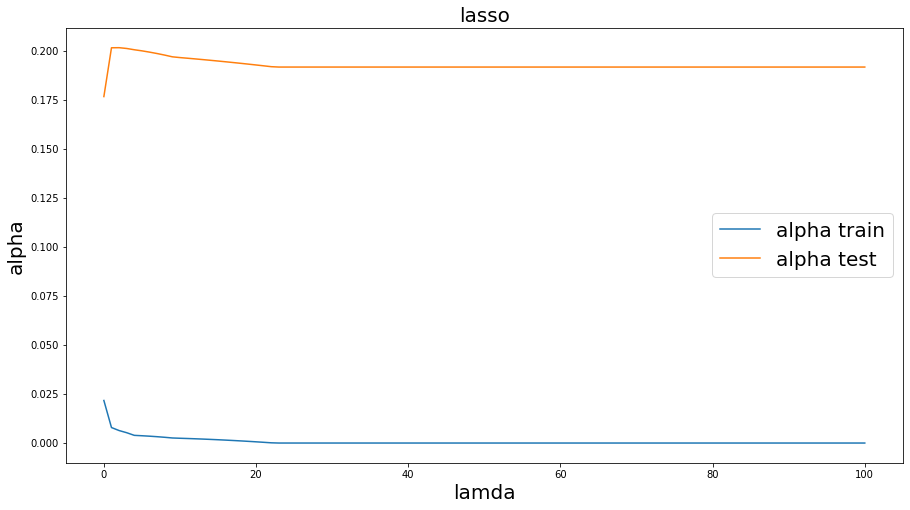

In [ ]:
f=plt.figure(figsize=(15,8))
plt.plot(alpha_train_3[0,:],label='alpha train')
plt.plot(alpha_test_3[0,:],label='alpha test')
plt.legend(fontsize=20)
plt.xlabel('lamda',fontsize=20);
plt.ylabel('alpha',fontsize=20);
plt.title('lasso',fontsize=20);

In [ ]:
## Constant
Y_train_predict=Y_train.mean()*np.ones((len(Y_train),1));
Y_test_predict=Y_test.mean()*np.ones((len(Y_test),1));
ErrorTrain_4=mean_squared_error(Y_train,Y_trainpredict);
ErrorTest_4=mean_squared_error(Y_test,Y_testpredict);
alpha_train_4=alpha1(ErrorTrain_0,ErrorTrain_4)
alpha_test_4=alpha1(ErrorTrain_0,ErrorTest_4)
print('alpha_train_4 = ',alpha_train_4,'\n','alpha_test_4 = ',alpha_test_4)

alpha_train_4 =  2.092457285218785e-08 
 alpha_test_4 =  0.19178213900367203


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
ErrorTrain_5=np.zeros((1,2))
alpha_train_5=np.zeros((1,2))
alpha_test_5=np.zeros((1,2))
ErrorTest_5=np.zeros((1,2))
for landa in range(2):
  polyreg=make_pipeline(PolynomialFeatures(landa+2),LinearRegression())
  polyreg.fit(X_train,Y_train)
  Y_trainpredict=polyreg.predict(X_train)
  Y_testpredict=polyreg.predict(X_test)
  ErrorTrain_5[0,landa]=mean_squared_error(Y_train,Y_trainpredict);
  ErrorTest_5[0,landa]=mean_squared_error(Y_test,Y_testpredict);
  alpha_train_5[0,landa]=alpha1(ErrorTrain_0,ErrorTrain_5[0,landa])
  alpha_test_5[0,landa]=alpha1(ErrorTrain_0,ErrorTest_5[0,landa])

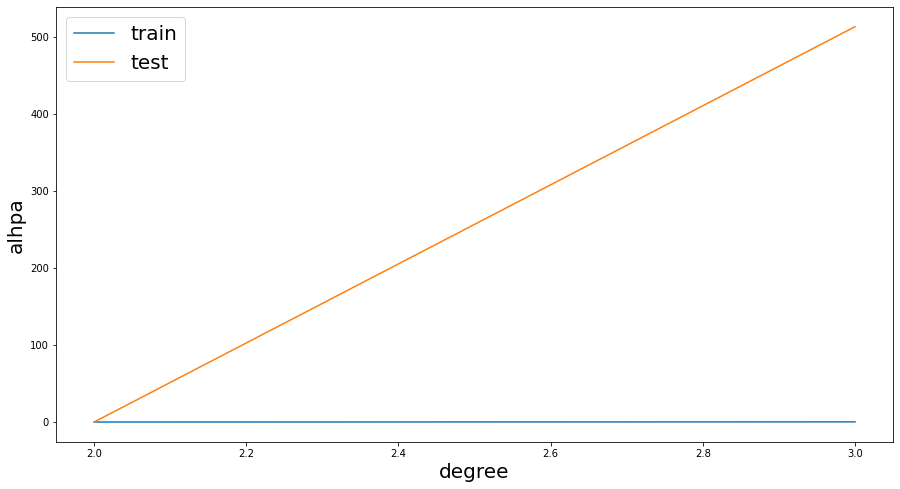

In [ ]:
f=plt.figure(figsize=(15,8))
plt.plot([2,3],alpha_train_5[0,:],label='train')
plt.plot([2,3],alpha_test_5[0,:],label='test')
plt.xlabel('degree',fontsize=20)
plt.ylabel('alhpa',fontsize=20)
plt.legend(fontsize=20);


In [ ]:
print('Error_train_5 = ',ErrorTrain_5,'\n','Error_test_5 = ',ErrorTest_5)
print('alpha_train_5 = ',alpha_train_5,'\n','alpha_test_5 = ',alpha_test_5)

Error_train_5 =  [[5.79167659 4.34799358]] 
 Error_test_5 =  [[   7.01236453 3253.1271845 ]]
alpha_train_5 =  [[0.08377378 0.31216019]] 
 alpha_test_5 =  [[1.09335469e-01 5.13635164e+02]]


In [ ]:
from sklearn.tree import DecisionTreeRegressor
ErrorTrain_6=np.zeros((1,100))
alpha_train_6=np.zeros((1,100))
alpha_test_6=np.zeros((1,100))
ErrorTest_6=np.zeros((1,100))
for landa in range(100):
  regr_1 = DecisionTreeRegressor(max_depth=landa+1)
  regr_1.fit(X_train,Y_train)
  Y_trainpredict=regr_1.predict(X_train)
  Y_testpredict=regr_1.predict(X_test)
  ErrorTrain_6[0,landa]=mean_squared_error(Y_train,Y_trainpredict);
  ErrorTest_6[0,landa]=mean_squared_error(Y_test,Y_testpredict);
  alpha_train_6[0,landa]=alpha1(ErrorTrain_0,ErrorTrain_6[0,landa])
  alpha_test_6[0,landa]=alpha1(ErrorTrain_0,ErrorTest_6[0,landa])

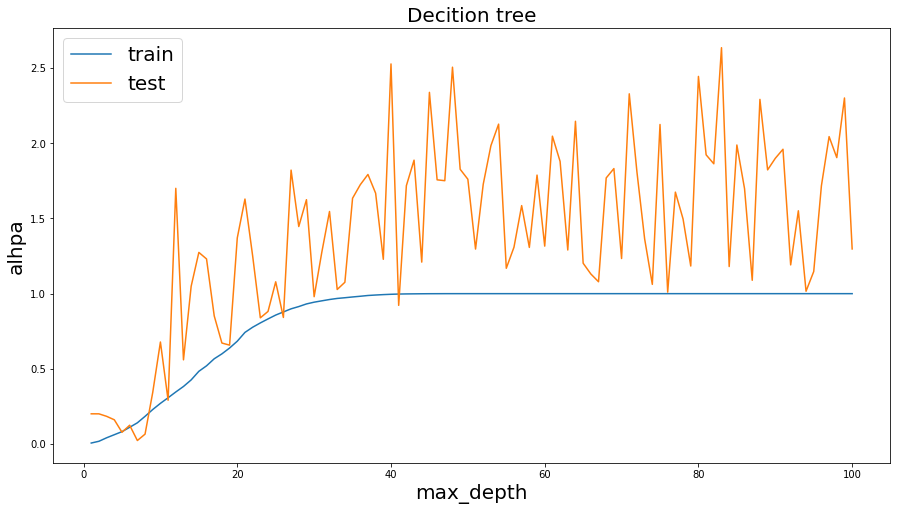

In [ ]:
f=plt.figure(figsize=(15,8))
plt.plot(range(1,101),alpha_train_6[0,:],label='train')
plt.plot(range(1,101),alpha_test_6[0,:],label='test')
plt.xlabel('max_depth',fontsize=20)
plt.ylabel('alhpa',fontsize=20)
plt.legend(fontsize=20);
plt.title('Decition tree',fontsize=20);


In [ ]:
## Step function
from sklearn.preprocessing import KBinsDiscretizer
from mlinsights.mlmodel import PiecewiseRegressor
from sklearn.dummy import DummyRegressor
ErrorTrain_7=np.zeros((1,5))
alpha_train_7=np.zeros((1,5))
alpha_test_7=np.zeros((1,5))
ErrorTest_7=np.zeros((1,5))
for landa in range(5):
  model = PiecewiseRegressor(verbose='tqdm',binner=KBinsDiscretizer(n_bins=100*(landa+1)),estimator=DummyRegressor())
  model.fit(X_train, Y_train)
  Y_trainpredict=model.predict(X_train)
  Y_testpredict=model.predict(X_test)
  ErrorTrain_7[0,landa]=mean_squared_error(Y_train,Y_trainpredict);
  ErrorTest_7[0,landa]=mean_squared_error(Y_test,Y_testpredict);
  alpha_train_7[0,landa]=alpha1(ErrorTrain_0,ErrorTrain_7[0,landa])
  alpha_test_7[0,landa]=alpha1(ErrorTrain_0,ErrorTest_7[0,landa])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_discretization.py:197: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_discretization.py:197: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_discretization.py:197: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_discretization.py:197: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_discretization.py:197: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in

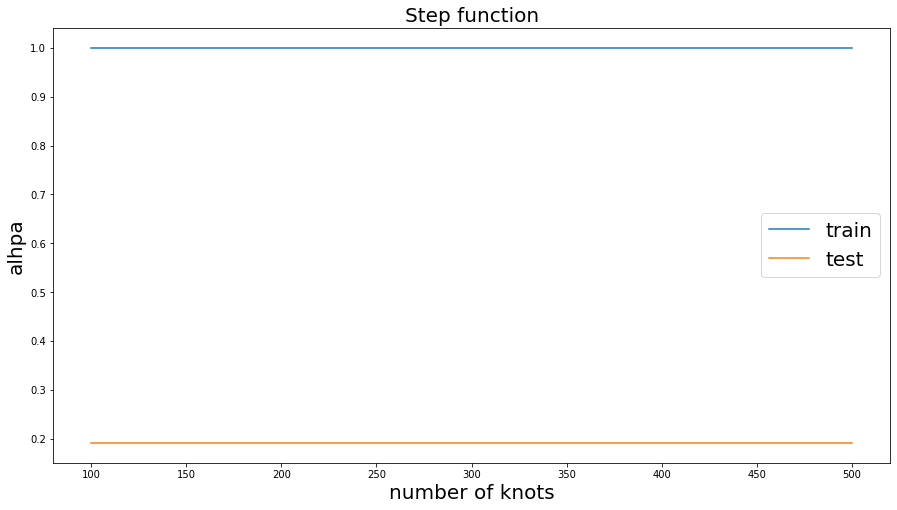

In [ ]:
f=plt.figure(figsize=(15,8))
plt.plot(np.arange(100,600,step=100),alpha_train_7[0,:],label='train')
plt.plot(np.arange(100,600,step=100),alpha_test_7[0,:],label='test')
plt.xlabel('number of knots',fontsize=20)
plt.ylabel('alhpa',fontsize=20)
plt.legend(fontsize=20);
plt.title('Step function',fontsize=20);


In [ ]:
del model
del polyreg
del regr_1
del clf

In [ ]:
## piecewise Linear
model = PiecewiseRegressor(verbose=True,
                           binner=KBinsDiscretizer(n_bins=500))
model.fit(X_train, Y_train)
Y_trainpredict=model.predict(X_train)
Y_testpredict=model.predict(X_test)
ErrorTrain_8=mean_squared_error(Y_train,Y_trainpredict);
ErrorTest_8=mean_squared_error(Y_test,Y_testpredict);
alpha_train_8=alpha1(ErrorTrain_0,ErrorTrain_8)
alpha_test_8=alpha1(ErrorTrain_0,ErrorTest_8)

In [ ]:
print('Error_train_8 = ',ErrorTrain_8,'\n','Error_test_8 = ',ErrorTest_8)
print('alpha_train_8 = ',alpha_train_8,'\n','alpha_test_8 = ',alpha_test_8)

Error_train_8 =  0.0 
 Error_test_8 =  5.204111301268498
alpha_train_8 =  1.0 
 alpha_test_8 =  0.17672487960503092


In [ ]:
del model

In [ ]:
## Bagging regression
from sklearn.ensemble import BaggingRegressor
ErrorTrain_9=np.zeros((3,100))
alpha_train_9=np.zeros((3,100))
alpha_test_9=np.zeros((3,100))
ErrorTest_9=np.zeros((3,100))
N_sample=np.array([[10,50,100]])
for i in range(3):
  for j in range(100):
    regr = BaggingRegressor(n_estimators=N_sample[0,i], random_state=0,max_samples=j+1).fit(X_train, Y_train)
    Y_trainpredict=regr.predict(X_train)
    Y_testpredict=regr.predict(X_test)
    ErrorTrain_9[i,j]=mean_squared_error(Y_train,Y_trainpredict);
    ErrorTest_9[i,j]=mean_squared_error(Y_test,Y_testpredict);
    alpha_train_9[i,j]=alpha1(ErrorTrain_0,ErrorTrain_9[i,j])
    alpha_test_9[i,j]=alpha1(ErrorTrain_0,ErrorTest_9[i,j])

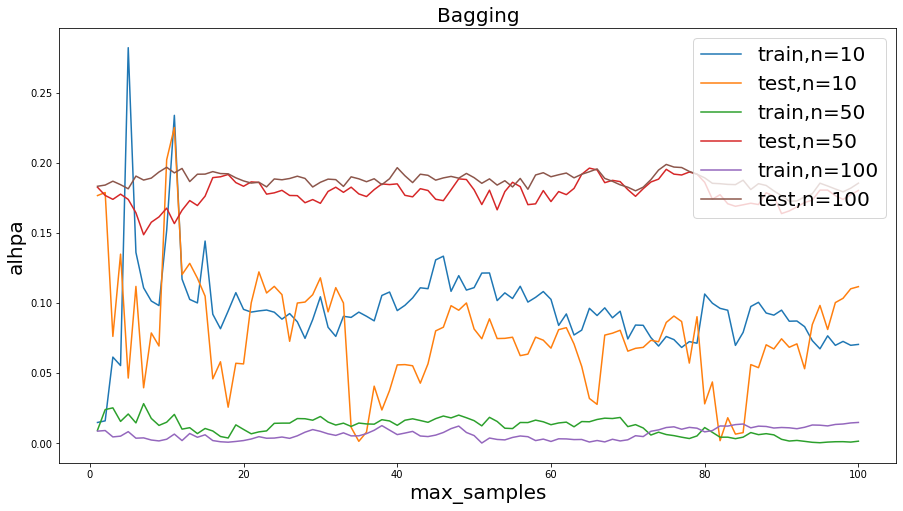

In [ ]:
f=plt.figure(figsize=(15,8))
plt.plot(np.arange(1,101),alpha_train_9[0,:],label='train,n=10')
plt.plot(np.arange(1,101),alpha_test_9[0,:],label='test,n=10')
plt.plot(np.arange(1,101),alpha_train_9[1,:],label='train,n=50')
plt.plot(np.arange(1,101),alpha_test_9[1,:],label='test,n=50')
plt.plot(np.arange(1,101),alpha_train_9[2,:],label='train,n=100')
plt.plot(np.arange(1,101),alpha_test_9[2,:],label='test,n=100')
plt.xlabel('max_samples',fontsize=20)
plt.ylabel('alhpa',fontsize=20)
plt.legend(fontsize=20);
plt.title('Bagging',fontsize=20);

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=100, random_state=0).fit(X_train,Y_train)
Y_trainpredict=regr.predict(X_train)
Y_testpredict=regr.predict(X_test)
ErrorTrain_10=mean_squared_error(Y_train,Y_trainpredict);
ErrorTest_10=mean_squared_error(Y_test,Y_testpredict);
alpha_train_10=alpha1(ErrorTrain_0,ErrorTrain_10)
alpha_test_10=alpha1(ErrorTrain_0,ErrorTest_10)

In [ ]:
print('Error_train_10 = ',ErrorTrain_10,'\n','Error_test_10 = ',ErrorTest_10)
print('alpha_train_10 = ',alpha_train_10,'\n','alpha_test_10 = ',alpha_test_10)


Error_train_10 =  0.9315598639205938 
 Error_test_10 =  6.3656700733838525
alpha_train_10 =  0.8526299660544522 
 alpha_test_10 =  0.0070303059779537325


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0,learning_rate=0.1,max_depth=30)
reg.fit(X_train, Y_train)
Y_trainpredict=reg.predict(X_train)
Y_testpredict=reg.predict(X_test)
ErrorTrain_11=mean_squared_error(Y_train,Y_trainpredict);
ErrorTest_11=mean_squared_error(Y_test,Y_testpredict);
alpha_train_11=alpha1(ErrorTrain_0,ErrorTrain_11)
alpha_test_11=alpha1(ErrorTrain_0,ErrorTest_11)

In [ ]:
print('Error_train_11 = ',ErrorTrain_11,'\n','Error_test_11 = ',ErrorTest_11)
print('alpha_train_11 = ',alpha_train_11,'\n','alpha_test_11 = ',alpha_test_11)


Error_train_11 =  4.0816563726705354e-07 
 Error_test_11 =  8.744814302475021
alpha_train_11 =  0.9999999354293952 
 alpha_test_11 =  0.3834039341062756


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
